<div>
<img src="figures/svtLogo.png"/>
</div>

<center><h1>Mathematical Optimization for Engineers</h1></center>
<center><h2>Lab 5 - KKT Conditions of Optimality</h2></center>

### KKT conditions for equality-constrained problems

We consider the following optimization problem 

$$\begin{aligned}
\displaystyle \min_{x_1,x_2} \;\; &x_1+x_2 \\
\mbox{s.t. } \; &x_2=x_1 ^2-2.
\end{aligned}$$

<u>Task 1</u>: Reformulate the optimization problem with the general nomenclature
of the Lecture in terms of $f$ and $c_{i}$.

<details>
<br>
The nomenclature from the lecture for general optimization problems is:

$$\begin{aligned}
\min_{\mathbf {x} \in \mathbb R^n} \quad &f(\mathbf {x}) \\
\mbox{s.t. } \quad &\mathbf {c_i}(\mathbf {x}) \leq \mathbf {0} \quad \forall i \in I \\
&\mathbf {c_i}(\mathbf {x}) = \mathbf {0}  \quad \forall i \in E
\end{aligned}$$

Here, we have $\mathbf {x} = \left[ \begin{array}{{c}}
                                        x_1 \\
                                        x_2
                                    \end{array} \right]$ and $n=2$; $f(x_1,x_2) = x_1 + x_2$ and $c(x_1,x_2)= x_2 - x_1^2+2$ are scalar functions. There are no inequality constraints in this example.
</details>

<u>Task 2</u>: -   What are the gradients of the objective function and the equality
constraint?

<details>
<br>
The gradient of the objective function and the constraint are 
$\mathbf \nabla f(x_1,x_2) = \left[ \begin{array}{c}
                                            1 \\
                                            1
                            \end{array}\right]$ and
$\mathbf \nabla c(x_1,x_2) = \left[ \begin{array}{c}
                                            -2x_1 \\
                                            1
                                \end{array}\right]$
</details>

<u>Task 3</u>: Sketch the feasible region of the optimization problem for
$x_1 \in [-2,2]$ and $x_2 \in [-2,3]$; add the contour lines of the
objective function; add the direction of the gradients of the
objective function and the equality constraint.

<details>
<div>
<img src="figures/HU52.png" width="300"/>
</div>
<br>
<br>
The feasible points lie on the parabola. The contour lines of the function $f$ are illustrated by the dotted parallel lines. The gradient of $f$ is perpendicular to the contour lines and points in the direction of strongest increase of the objective function. The gradients of $c$ are also perpendicular to the graph of $c$. Note, that if we formulated the constraint $c$ as

$$ c(x_1,x_2)=-x_2+x_1^2-2$$ 

the gradients would point in the opposite direction. From the figure, we know that the minimum is at that point of the parabola, where the gradient of $c$ points in exactly the same direction as the gradient of $f$.
</details>

<u>Task 4</u>: Set up the Langrangian function for this optimization problem

<details>
<br>
The general Lagrangian function $L$ is defined as

$$L (\mathbf {x}, \mathbf {\lambda}) = f(\mathbf {x}) + \mathbf {\lambda^T} \mathbf {c}(\mathbf {x})$$

And in our case, the Lagrangian function $L$ is

$$L (x_1,x_2,\lambda) = x_1 + x_2 + \lambda (x_2 - x_1^2+2)$$ 

$\lambda \in \mathbb R$ is the Lagrange multiplier with respect to the equality constraint. 
       
</details>

<u>Task 5</u>: Write down the KKT-conditions with respect to this optimization
problem

<details>
<br>
The KKT-conditions of a general optimization problem are

$$\begin{aligned}
\nabla_{\mathbf {x}} L(\mathbf {x},\mathbf {\lambda}) & = \mathbf {{0}}       \\
\mathbf {c}_i(\mathbf {x}) & \leq  \mathbf {0}  \quad   i \in I            \\
\mathbf {c}_i(\mathbf {x}) & =     \mathbf {0}  \quad  i \in E    \\
\mathbf {\lambda_{i} } & \geq  0       \quad \forall i \in I          \\
\lambda_i \cdot c_i(\mathbf {x}) & =     0 \quad \forall i \in I
\end{aligned}$$
<br>
<br>
In our case, stationarity is

$$\left[\begin{array}{c}
    1 \\
    1
\end{array}\right]
+ \lambda \cdot
\left[\begin{array}{cc}
-2x_1 &  \\
1   &
\end{array}\right]
= \left[\begin{array}{cc}
0 \\
0 \\
\end{array}\right]$$

This leads to two equations, we have to solve, namely

\(I\) $1 - 2 \lambda x_1 = 0$

\(II\) $1 + \lambda = 0 \Rightarrow \lambda = -1$

Since we do not have any inequality constraints. Primal fesibility reduces to

\(III\) $x_2 - x_1^2 + 2 = 0$

Dual feasibility and complementarity slackness are similarly non-existent in this case.
</details>

<u>Task 6</u>: Solve manually the KKT-conditions for $x_1$, $x_2$ and the Lagrange
multiplier.

<details>
<br>
We have three equations and three unknown variables. By inserting
(II) in (I), we get $x_1 = -\frac{1}{2}$. Afterwards, we can solve (III)
for $x_2$, which leads to
$x_2 = -2 + \frac{1}{4} = -1.75$. 
<br>
As you see, in this case, $\lambda$ is negative. If we had written the equality constraint as

$$ c(x_1,x_2)=-x_2+x_1^2-2=0$$

$\lambda$ would be positive. This is the reason, why dual feasibility

$$\begin{aligned}
\lambda_i & \geq  0     \quad \forall i \in I            \\
\lambda_i \cdot c_i(\mathbf {x}) & =     0 \quad \forall i \in I
\end{aligned}$$

makes sense for only inequality constraints and not for equality constraints. 
</details>

<u>Task 7</u>: Solve numerically (with `fsolve` from scipy.optimize) the KKT-conditions for
$x_1$, $x_2$ and the Lagrange multiplier.

In [1]:
from scipy import optimize as opt
import numpy as np

def kkt_conditions(y):
    conds = np.zeros(len(y))
    x1 = y[0]
    x2 = y[1]
    l = y[2]
    
    conds[0] = 1 - 2*l*x1
    conds[1] = 1 + l
    conds[2] = x2 - x1**2 + 2
    return conds
    

y0 = np.array([-1.0, -1.0, -1.0]) # initial guess 

res = opt.fsolve(kkt_conditions, y0, full_output=False)

print ("x1 = {:.2f} \nx2 = {:.2f} \nl = {:.2f}".format(res[0],res[1],res[2]))

x1 = -0.50 
x2 = -1.75 
l = -1.00


### KKT conditions for inequality-constrained problems

We consider the following optimization problem 

$$\begin{aligned}
\displaystyle \min_{x_1,x_2} \quad &x_1+x_2 \\
\mbox{s.t. } \; &x_1 \geq -2 \\
&x_2  \geq -2
\end{aligned}$$

<u>Task 1</u>: Reformulate the optimization problem with the general nomenclature
of the Lecture in terms of $f$ and $c_{i}$.

<details>
<br>
With the nomenclature introduced before, we can write
$\mathbf x = \left[ \begin{array}{{c}}
                                        x_1 \\
                                        x_2
                                    \end{array} \right]$ and $n=2$,
$f(\mathbf x) = x_1 + x_2$ and
${ \mathbf c(\mathbf x)}= \left( \begin{array}{{c}}
                                                                                                                                         -x_1 - 2 \\
                                                                                                                                         -x_2 - 2
                                                                                                                                     \end{array} \right)$. 

There are no equality constraints in this case.
</details>

<u>Task 2</u>: -   What are the gradients of the objective function and the inequality
constraints?

<details>
<br>
The gradient of the objective function is
$\nabla f(\mathbf x) = \left[ \begin{array}{c}
                                            1 \\
                                            1 \\
                            \end{array}\right]$ and the gradients of the constraints are
$\nabla c_1(\mathbf x) = \left[ \begin{array}{c}
                                            -1 \\
                                            0 \\
                            \end{array}\right]$ and
$\nabla c_2(\mathbf x) = \left[ \begin{array}{c}
                                            0 \\
                                            -1 \\
                            \end{array}\right]$

</details>

<u>Task 3</u>: -   Sketch the feasible region of the optimization problem for
$x_1 \in [-3,1]$ and $x_2 \in [-3,1]$; add the contour lines of the
objective function; add the direction of the gradients of the
objective function and the inequality constraints.

<details>
<img src="figures/HU51.png" width="300"/>
</div>
The gradients of the constraints are illustrated by arrows pointing out of the
feasible set. The contour lines of the function $f$ are illustrated by the dotted parallel lines. The gradient of $f$ is perpendicular to the contour lines and points in the direction of strongest increase of the objective function. So, where is the minimum of this optimization problem?

Clearly, it is at the point $\mathbf { x} = \left[ \begin{array}{{c}}
                                        -2 \\
                                        -2
                                    \end{array} \right]$.
</details>

<u>Task 4</u>: Set up the Langrangian function for this optimization problem

<details>
<br>
$$\begin{aligned}
        L (x_1,x_2,\lambda_1,\lambda_2) = x_1 + x_2 + \lambda_1 (-x_1 - 2) + \lambda_2 (-x_2 - 2)
\end{aligned}$$
        
Note, that we have two Lagrange multipliers ($\lambda_1$ and
$\lambda_2$), since we have two constraints.
       
</details>

<u>Task 5</u>: Write down the KKT-conditions with respect to this optimization
problem

<details>
<br>
<u>Stationarity</u>: $\left[\begin{array}{c}
                        1  \\
                        1  \\
                \end{array}\right] +
                \left[\begin{array}{cc}
                        -1 & 0 \\
                        0 & -1 \\
                \end{array}\right] \cdot \left( \begin{array}{{c}}
                                                                        \lambda_1 \\
                                                                        \lambda_2
                                                                 \end{array} \right) =
                \left[\begin{array}{c}
                        0 \\
                        0 \\
                \end{array}\right]$

This leads to two equations, which have to be satisfied

(I): $1 - \lambda_1 = 0 \Rightarrow \lambda_1 = 1$

(II): $1 - \lambda_2 = 0\Rightarrow \lambda_2 = 1$

<u>Primal feasibilty</u> means that the constraints $\mathbf {c}_I(x_1,x_2)$ have to
be fulfilled, namely

(III): $x_1 + 2 \geq 0$

(IV): $x_2 + 2 \geq 0$

<u>Dual feasibilty</u>:

(V-VI): $\lambda_1, \lambda_2 \geq 0$
    
<u>Complementarity slackness</u>:    
    
(VII-VIII): $\lambda_1 (-x_1 - 2) = 0, \lambda_2 (-x_2 - 2) = 0$
</details>

<u>Task 6</u>: Solve manually the KKT-conditions for $x_1$, $x_2$ and the Lagrange
multiplier.

<details>
<br>
Note, that from equations (I) and (II) both Lagrange multipliers are equal to 1.

Thus, from VII-VIII, both constraints are active.
    
It follows from (VII), that $x_1 = -2$. Similarily, from (VIII), $x_2 = -2$. 
</details>

### A degenerate case

We consider the following optimization problem 

$$\begin{aligned}
\displaystyle \min_{x_1,x_2} \quad &x_1 \\
\mbox{s.t. } \;  &x_{2} \leq 0 \\
&x_{1}^{2} - x_{2} \leq 0\,.
\end{aligned}$$

<u>Task 1</u>: Write down the KKT-conditions with respect to this optimization
problem

<details>
<br>

$$L(\mathbf {x},\mathbf {\lambda}) \; = \; x_1 + \lambda_1 x_2 + \lambda_2 (x_1^2 - x_2)$$
KKT conditions:
$$\begin{aligned}
\nabla_{{x_1}}L \; &= \; 1 + 2x_1\lambda_2 = 0\\
\nabla_{{x_2}}L \; &= \; \lambda_1 - \lambda_2 = 0 \\
x_2 \; &\leq \; 0 \\
x_1^2 - x_2 \; &\leq \; 0\\
\lambda_1 \cdot x_2 \; &= \; 0\\
\lambda_2 \cdot (x_1^2-x_2) \; &= \; 0
\end{aligned}$$

<u>Task 2</u>: Solve manually the KKT-conditions for $x_1$, $x_2$ and the Lagrange
multipliers.

<details>
<br>
The system of equations above has no solution. We can see, for example,

$\lambda_1 = \lambda_2$ from stationarity (see above)

Consider the two possible cases:

1.  $\lambda = 0 \implies 1= 0$ (stationarity)
<br>
<br>
2.  $\lambda > 0 \implies x_1,x_2=0$ (complementatrity) <br>
$ \quad \quad \; \implies 1= 0 \quad \quad$ (stationarity) 

We cannot solve the equation system as the rows of the constraint Jacobian are <u>linearly dependent</u> at the isolated feasible point: 

$$\begin{aligned}
    \text{Jacobian }(x_1,x_2) = 
\begin{bmatrix}
0 \quad &1 \\
2x_1 \quad &-1 
\end{bmatrix}\\
\\
\text{Jacobian }(0,0) = \begin{bmatrix}
0 \quad &1 \\
0 \quad &-1 
\end{bmatrix}
\end{aligned}$$
</details> 
</details>

<u>Task 3</u>: Sketch the feasible region of the optimization problem; add the contour lines of the
objective function; add the direction of the gradients of the objective function and the constraints. Where is the optimum?

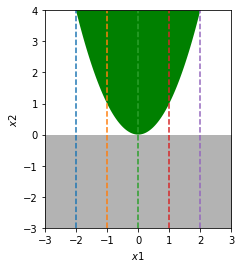

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# plot the feasible region
d = np.linspace(-3,3,300)
x,y = np.meshgrid(d,d)
fig, ax = plt.subplots()

plt.imshow(((y<=0)).astype(int) , 
                extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="Greys", alpha = 0.3);
# plot the lines defining the constraints
x = np.linspace(-2, 2, 500)
y = np.linspace(-1, 2, 500)

y1 = x**2
y2 = 4*np.ones_like(x)
ax.fill_between(x, y1, y2, where=y1 <= y2, facecolor='green', interpolate=True)

for i in range(-2,3): 
    plt.plot(i*np.ones(len(np.arange(-3,5))), np.arange(-3,5), '--')
plt.ylim([-3,4])
plt.xlabel(r'$x1$')
plt.ylabel(r'$x2$')
plt.show()

The green shaded feasible area and the grey shaded area do not overlap, but only touch at the origin. 
The gradients are anti-parallel at this point and therefore, the rows of the Jacobian are linearly dependent. The KKT conditions, thus, cannot help to identify this point as optimal point. 